In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('../../data/orig_train.csv')
df.head()

,PRODUCT,AGE,AREA,RESIDENTIAL_PLACE,EDUCATION,MARITAL_STATUS,HOUSEHOLD_MEMBERS,NO_OF_DEPENDENTS,INCOME,WORK_SENIORITY,...,LENGTH_RELATIONSHIP_WITH_CLIENT,DEBIT_CARD,CURRENT_ACCOUNT,SAVING_ACCOUNT,SALARY_ACCOUNT,FOREIGN_ACCOUNT,FINALIZED_LOAN,DEPOSIT,PENSION_FUNDS,DEFAULT_FLAG
0,C,65,County capital,Owner without mortgage,University,married,2,0,1245.0,5,...,1,0,0,0,0,0,0,0,0,0
1,C,64,County capital,Owner without mortgage,University,married,2,0,1380.0,5,...,8,0,0,0,0,0,0,0,0,0
2,F,30,Urban area,Living with family,University,married,2,0,1131.0,2,...,1,1,1,0,0,0,0,0,0,0
3,C,39,County capital,Owner without mortgage,Post-graduate,divorced,1,0,1730.0,9,...,2,0,0,0,0,0,0,0,0,0
4,B,38,County capital,Owner without mortgage,Highschool,single,1,0,1189.0,5,...,1,1,1,0,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15097 entries, 0 to 15096
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PRODUCT                          15097 non-null  object 
 1   AGE                              15097 non-null  int64  
 2   AREA                             15097 non-null  object 
 3   RESIDENTIAL_PLACE                15097 non-null  object 
 4   EDUCATION                        15097 non-null  object 
 5   MARITAL_STATUS                   15097 non-null  object 
 6   HOUSEHOLD_MEMBERS                15097 non-null  int64  
 7   NO_OF_DEPENDENTS                 15097 non-null  int64  
 8   INCOME                           15097 non-null  float64
 9   WORK_SENIORITY                   15097 non-null  int64  
 10  BUSINESS AGE                     15097 non-null  int64  
 11  ECONOMIC_SECTOR                  15097 non-null  object 
 12  EMPLOYEE_NO       

In [10]:
for col in df:
    print(col, df[col].unique())

PRODUCT ['C' 'F' 'B' 'E' 'D' 'A']
AGE [65 64 30 39 38 40 45 27 34 28 41 42 63 32 47 67 68 33 44 24 54 57 46 37
 31 35 25 36 66 51 50 29 23 59 61 62 22 48 43 53 55 21 26 56 60 49 52 58
 19 69 70 20 74]
AREA ['County capital' 'Urban area' 'Rural area' 'Missing']
RESIDENTIAL_PLACE ['Owner without mortgage' 'Living with family' 'Owner with mortgage'
 'Rental' 'Other']
EDUCATION ['University' 'Post-graduate' 'Highschool' 'Missing'
 'Post secondary school' 'Other' 'College' 'Vocational school'
 'Middle school' 'Primary school']
MARITAL_STATUS ['married' 'divorced' 'single' 'widow']
HOUSEHOLD_MEMBERS [2 1 3 4 5]
NO_OF_DEPENDENTS [0 1 2 3 4]
INCOME [1245.   1380.   1131.   ... 5112.   2015.17 3733.6 ]
WORK_SENIORITY [ 5  2  9  7  4 20  3 10  8  1 13 32  6 12 17 28 16 18 14 11 15 38 19 36
 21 22 25 24 45 23 37 27 26 43 29 40 35 33 30 31 34 39 41 46 42]
BUSINESS AGE [ 16   6  13   9  12  18  23  15  11  17  22  14  24  33  25  19   5  10
   8   3  32  51  21  35  20  26  52  42  86  43   4  46  

Columns 'area', 'education', 'economic_sector', 'employee_no' have value 'Missing'
Lets see what portion of the data is missing

In [33]:
col_names = ['AREA', 'EDUCATION', 'ECONOMIC_SECTOR', 'EMPLOYEE_NO']
for col_name in col_names:
    print(df[col_name].value_counts()['Missing']/len(df))

0.002185864741339339
0.04577068291713585
0.2655494469099821
0.2211035305027489


Imputing missing values, first see most frequent values in each column

In [45]:
for col_name in col_names:
    most_frequent = df[col_name].mode()
    print(most_frequent)

0    County capital
Name: AREA, dtype: object
0    University
Name: EDUCATION, dtype: object
0    Missing
Name: ECONOMIC_SECTOR, dtype: object
0    Missing
Name: EMPLOYEE_NO, dtype: object


In two columns mode is the missing value, we have to imput it using different technique 

In [67]:
df['AREA'].replace('Missing', df['AREA'].mode()[0], inplace=True)
df['EDUCATION'].replace('Missing', df['EDUCATION'].mode()[0], inplace=True)

PRODUCT ['C' 'F' 'B' 'E' 'D' 'A']
AGE [65 64 30 39 38 40 45 27 34 28 41 42 63 32 47 67 68 33 44 24 54 57 46 37
 31 35 25 36 66 51 50 29 23 59 61 62 22 48 43 53 55 21 26 56 60 49 52 58
 19 69 70 20 74]
AREA ['County capital' 'Urban area' 'Rural area']
RESIDENTIAL_PLACE ['Owner without mortgage' 'Living with family' 'Owner with mortgage'
 'Rental' 'Other']
EDUCATION ['University' 'Post-graduate' 'Highschool' 'Post secondary school' 'Other'
 'College' 'Vocational school' 'Middle school' 'Primary school']
MARITAL_STATUS ['married' 'divorced' 'single' 'widow']
HOUSEHOLD_MEMBERS [2 1 3 4 5]
NO_OF_DEPENDENTS [0 1 2 3 4]
INCOME [1245.   1380.   1131.   ... 5112.   2015.17 3733.6 ]
WORK_SENIORITY [ 5  2  9  7  4 20  3 10  8  1 13 32  6 12 17 28 16 18 14 11 15 38 19 36
 21 22 25 24 45 23 37 27 26 43 29 40 35 33 30 31 34 39 41 46 42]
BUSINESS AGE [ 16   6  13   9  12  18  23  15  11  17  22  14  24  33  25  19   5  10
   8   3  32  51  21  35  20  26  52  42  86  43   4  46  62  36  66  61
   2  

In [68]:
def impute_following_distribution(df, col_name):
    value_counts = df[col_name].value_counts()
    number_of_missing_values = value_counts['Missing']
    value_counts_dict = value_counts[1:].to_dict()

    for key in value_counts_dict.keys():
        value_counts_dict[key] = value_counts_dict[key] / (len(df) - number_of_missing_values)

    df[col_name].replace('Missing', np.random.choice(list(value_counts_dict.keys()), p=list(value_counts_dict.values())),
                         inplace=True)

impute_following_distribution(df, 'ECONOMIC_SECTOR')
impute_following_distribution(df, 'EMPLOYEE_NO')

for col in df:
    print(col, df[col].unique())

PRODUCT ['C' 'F' 'B' 'E' 'D' 'A']
AGE [65 64 30 39 38 40 45 27 34 28 41 42 63 32 47 67 68 33 44 24 54 57 46 37
 31 35 25 36 66 51 50 29 23 59 61 62 22 48 43 53 55 21 26 56 60 49 52 58
 19 69 70 20 74]
AREA ['County capital' 'Urban area' 'Rural area']
RESIDENTIAL_PLACE ['Owner without mortgage' 'Living with family' 'Owner with mortgage'
 'Rental' 'Other']
EDUCATION ['University' 'Post-graduate' 'Highschool' 'Post secondary school' 'Other'
 'College' 'Vocational school' 'Middle school' 'Primary school']
MARITAL_STATUS ['married' 'divorced' 'single' 'widow']
HOUSEHOLD_MEMBERS [2 1 3 4 5]
NO_OF_DEPENDENTS [0 1 2 3 4]
INCOME [1245.   1380.   1131.   ... 5112.   2015.17 3733.6 ]
WORK_SENIORITY [ 5  2  9  7  4 20  3 10  8  1 13 32  6 12 17 28 16 18 14 11 15 38 19 36
 21 22 25 24 45 23 37 27 26 43 29 40 35 33 30 31 34 39 41 46 42]
BUSINESS AGE [ 16   6  13   9  12  18  23  15  11  17  22  14  24  33  25  19   5  10
   8   3  32  51  21  35  20  26  52  42  86  43   4  46  62  36  66  61
   2  

In [4]:
df.describe()

,AGE,HOUSEHOLD_MEMBERS,NO_OF_DEPENDENTS,INCOME,WORK_SENIORITY,BUSINESS AGE,LENGTH_RELATIONSHIP_WITH_CLIENT,DEBIT_CARD,CURRENT_ACCOUNT,SAVING_ACCOUNT,SALARY_ACCOUNT,FOREIGN_ACCOUNT,FINALIZED_LOAN,DEPOSIT,PENSION_FUNDS,DEFAULT_FLAG
count,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.0,15097.000000
mean,43.584553,1.717229,0.199510,1958.071916,6.647347,17.938001,4.996556,0.384116,0.485461,0.000397,0.123203,0.000132,0.164205,0.003709,0.0,0.057230
std,13.460964,0.759843,0.493135,1772.153274,5.647763,12.477914,4.900952,0.486402,0.499805,0.019932,0.328681,0.011509,0.370474,0.060793,0.0,0.232289
min,19.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,32.000000,1.000000,0.000000,1007.420000,3.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,42.000000,2.000000,0.000000,1426.495000,5.000000,16.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,56.000000,2.000000,0.000000,2290.000000,8.000000,21.000000,10.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
max,74.000000,5.000000,4.000000,40621.600000,46.000000,116.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


Encoding categorical variables (TODO)

In [84]:
categorical_col_names = ['PRODUCT', 'AREA', 'RESIDENTIAL_PLACE', 'EDUCATION', 'MARITAL_STATUS',
       'ECONOMIC_SECTOR']

encoded_df = pd.get_dummies(df, columns=categorical_col_names)

#encoded_df = encoded_df['EMPLOYEE_NO']

/var/folders/tq/f8kl87vd37qdfktfzkcp64800000gn/T/ipykernel_11053/1557209022.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  encoded_df = encoded_df['EMPLOYEE_NO'].replace(replacement_rule)


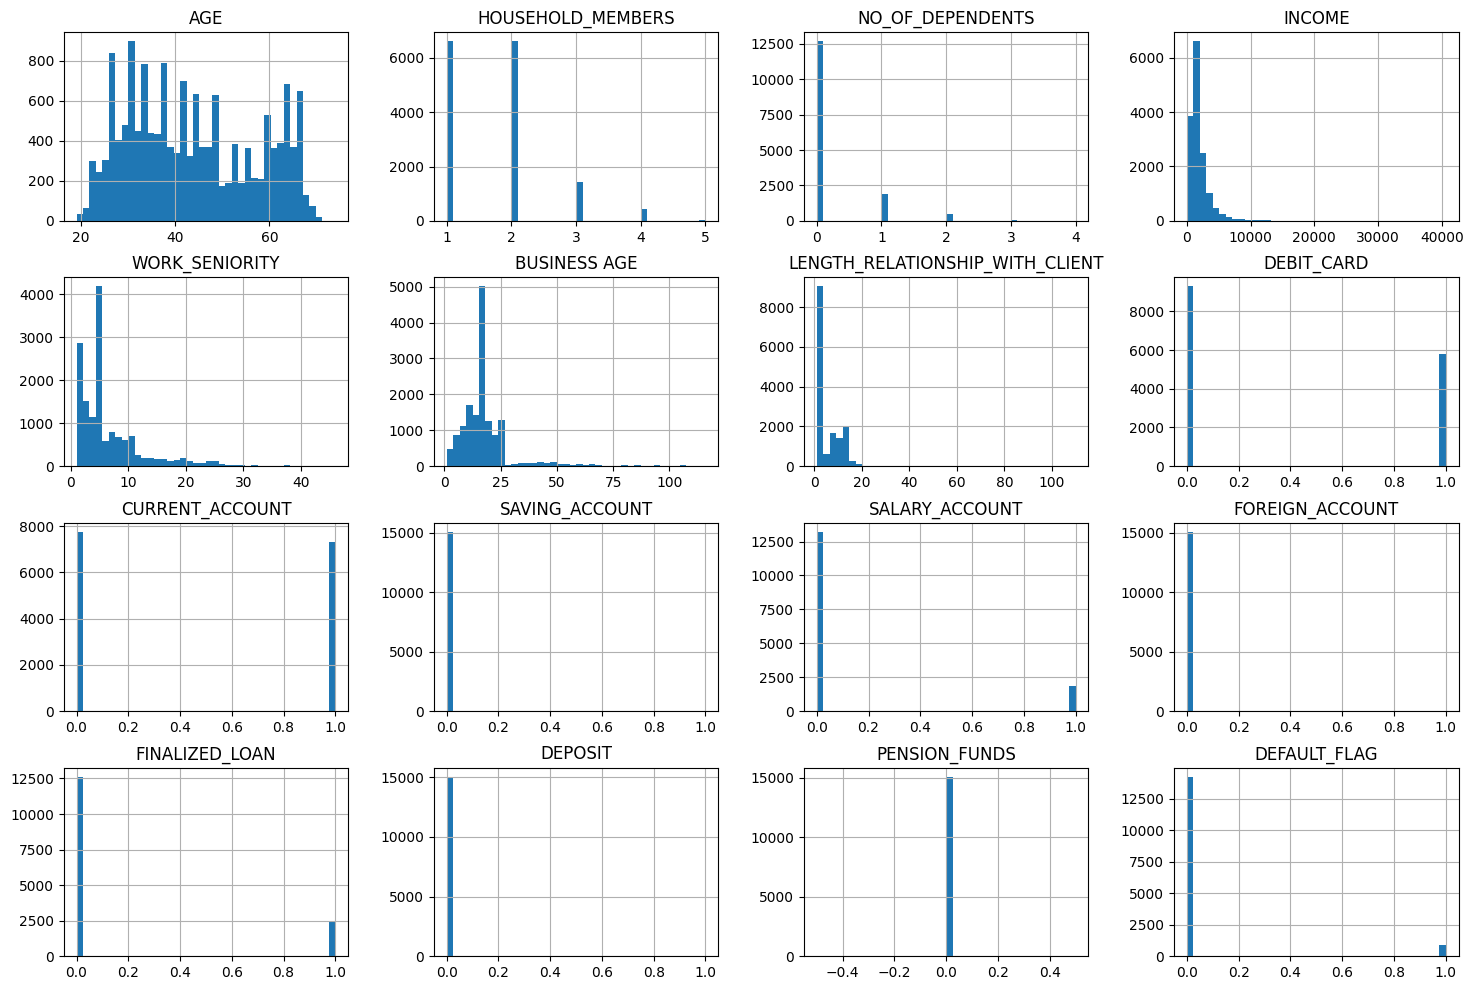

In [10]:
df.hist(bins=40, figsize=(18,12))

plt.show()

Low variance variables: saving_account, foreign_account, deposit, pension_funds

Delete?

In [71]:
low_variance_col_names = ['SAVING_ACCOUNT', 'FOREIGN_ACCOUNT', 'DEPOSIT', 'PENSION_FUNDS']
for col_name in low_variance_col_names:
    print(df[col_name].value_counts())

SAVING_ACCOUNT
0    15091
1        6
Name: count, dtype: int64
FOREIGN_ACCOUNT
0    15095
1        2
Name: count, dtype: int64
DEPOSIT
0    15041
1       56
Name: count, dtype: int64
PENSION_FUNDS
0    15097
Name: count, dtype: int64


In [ ]:
df = pd.get_dummies(df, columns=)

<Axes: >

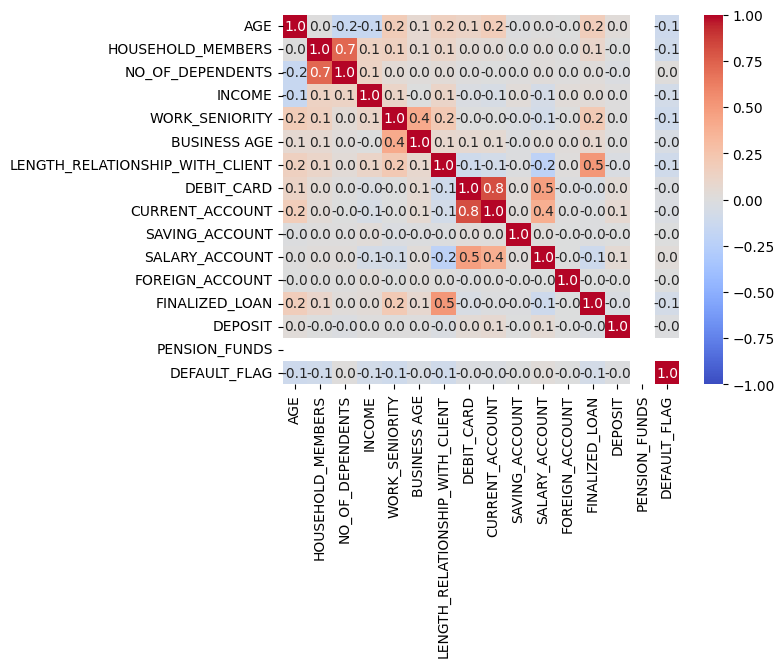

In [75]:
numeric_data = df.select_dtypes(include=['int64', 'float64'])

sns.heatmap(numeric_data.corr(), annot = True, cmap = 'coolwarm', fmt='.1f', center = 0, vmin = -1, vmax = 1)